In [1]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram

import matplotlib
import qiskit_ibm_runtime
import qiskit_ibm_provider
from qiskit_aer import Aer
from qiskit import IBMQ

/tmp/ipykernel_38274/1421683371.py:8: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  import qiskit_ibm_provider


In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel='ibm_quantum',token='cf70125004fa9422f6337afe3160ae67154dcf1b61ebec388ade05481b57df825d5dd53eab50b76f1f9fb0625f4e077ebfd6c544cb8c893d6a8294f7359954d1')



In [3]:
IBMQ.save_account('cf70125004fa9422f6337afe3160ae67154dcf1b61ebec388ade05481b57df825d5dd53eab50b76f1f9fb0625f4e077ebfd6c544cb8c893d6a8294f7359954d1')


/tmp/ipykernel_38274/2096605343.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('cf70125004fa9422f6337afe3160ae67154dcf1b61ebec388ade05481b57df825d5dd53eab50b76f1f9fb0625f4e077ebfd6c544cb8c893d6a8294f7359954d1')
configrc.store_credentials:WARNING:2024-04-28 07:20:47,566: Credentials already present. Set overwrite=True to overwrite.


In [4]:
backend = service.backend(name='ibm_osaka')
backend.num_qubits

127

/home/crisprbog/anaconda3/envs/code/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


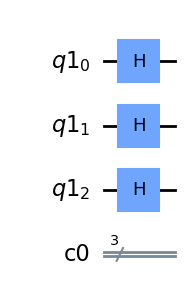

In [5]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

circuit = QuantumCircuit(qr, cr)
circuit.h(0)
circuit.h(1)
circuit.h(2)

circuit.draw(output='mpl')



In [6]:
import numpy as np

[circuit.rz(np.pi/2,qubit)for qubit in range(3)]

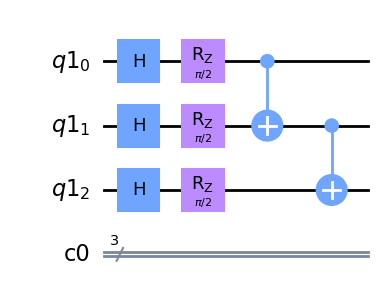

In [7]:
circuit.cx(qr[0], qr[1])
circuit.cx(qr[1], qr[2])
circuit.draw(output='mpl')

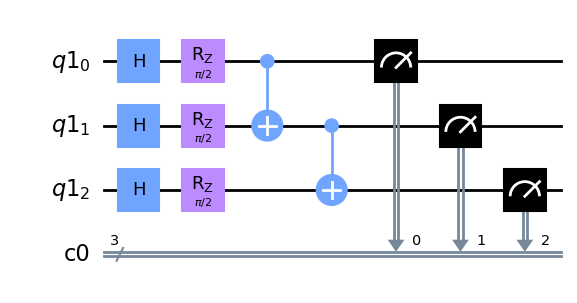

In [8]:
circuit.measure([0,1,2], [0,1,2])
circuit.draw(output='mpl')

In [9]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
simualator = Aer.get_backend('qasm_simulator')
shots =50

In [11]:
from qiskit import execute
result = execute(circuit, backend=simualator, shots=shots).result()

/tmp/ipykernel_38274/2815101929.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, backend=simualator, shots=shots).result()


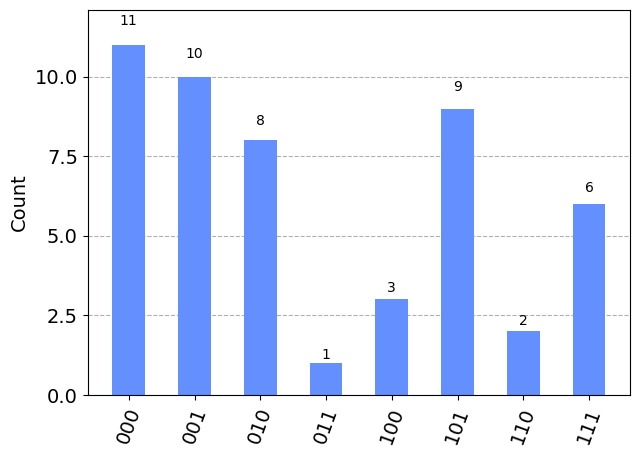

In [12]:
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(circuit))

In [13]:
provider = IBMQ.get_provider('ibm-q')
quantP = provider.get_backend('ibm_osaka')

In [14]:
job = execute(circuit,backend=quantP)

/tmp/ipykernel_38274/3460307854.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit,backend=quantP)


In [16]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

/tmp/ipykernel_38274/2249758446.py:1: DeprecationWarning: qiskit.tools.monitor is deprecated and will be removed in Qiskit 1.0.0
  from qiskit.tools.monitor import job_monitor


Job Status: job has successfully run


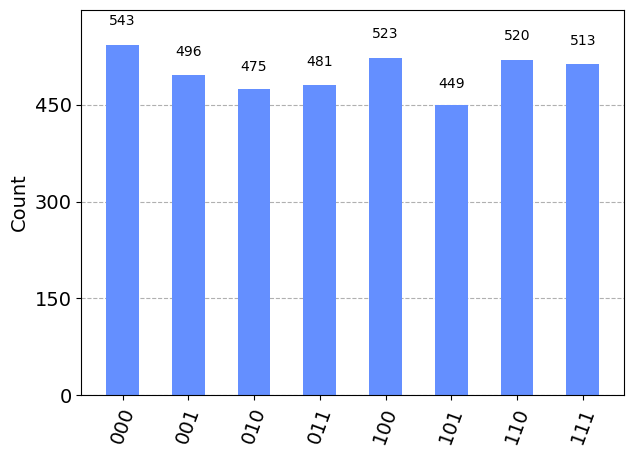

In [17]:
results = job.result()
plot_histogram(results.get_counts(circuit))